In [5]:
# implementing Apriori algorithm from mlxtend

# conda install -c conda-forge mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules

In [6]:
groceries = []
# As the file is in transaction data we will be reading data directly 
with open("groceries.csv") as f:
    groceries = f.read()


In [7]:
# splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))
    

In [8]:
all_groceries_list = [i for item in groceries_list for i in item]
from collections import Counter


In [9]:
item_frequencies = Counter(all_groceries_list)
# after sorting
#item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])


In [10]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))


<ipython-input-19-b9360d14befa>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(height = frequencies[0:11],x = list(range(0,11)),color='rgbkymc')


Text(0, 0.5, 'Count')

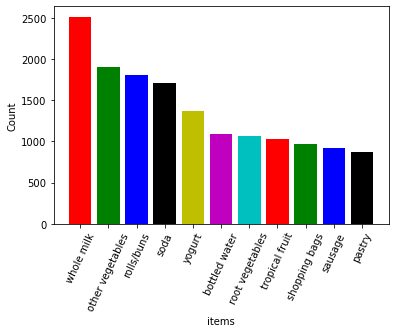

In [19]:
# barplot of top 10 

import matplotlib.pyplot as plt

plt.bar(height = frequencies[0:11],x = list(range(0,11)),color='rgbkymc')
plt.xticks(list(range(0,11),),items[0:11], rotation = 65)
plt.xlabel("items")
plt.ylabel("Count")


In [20]:
# Creating Data Frame for the transactions data 

# Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate 
groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction

groceries_series.columns = ["transactions"]


In [21]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)


<ipython-input-24-ff02c8146d33>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11], rotation = 60)


Text(0, 0.5, 'support')

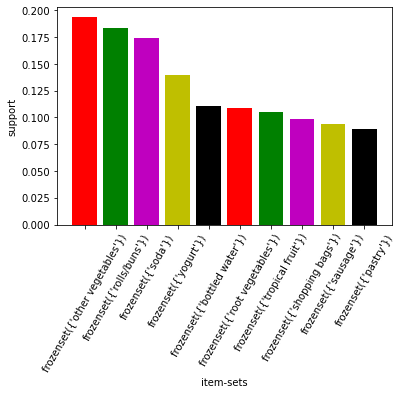

In [24]:

# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11], rotation = 60)
plt.xlabel('item-sets');plt.ylabel('support')


In [25]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
6,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
7,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
8,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
9,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693


In [26]:
rules.sort_values('lift',ascending = False,inplace=True)


In [28]:
########################## To eliminate Redudancy in Rules #################################### 
def to_list(i):
    return (sorted(list(i)))


ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)


ma_X = ma_X.apply(sorted)


In [29]:
rules_sets = list(ma_X)

In [30]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


In [31]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]


In [32]:

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2566,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2022,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
1311,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
2052,"(other vegetables, root vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2204,"(pip fruit, citrus fruit)",(tropical fruit),0.013828,0.104931,0.005592,0.404412,3.854060,0.004141,1.502831
780,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
1463,(butter),"(whole milk, whipped/sour cream)",0.055414,0.032232,0.006711,0.121101,3.757185,0.004925,1.101114
2433,"(curd, tropical fruit)",(yogurt),0.010269,0.139502,0.005287,0.514851,3.690645,0.003855,1.773680
1026,"(beef, other vegetables)",(root vegetables),0.019725,0.108998,0.007931,0.402062,3.688692,0.005781,1.490123
1883,(butter),"(whole milk, domestic eggs)",0.055414,0.029995,0.005999,0.108257,3.609174,0.004337,1.087763
